In [141]:
# import all the necessary libraries
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

In [142]:
# Download the Excel file manually from the provided URL and save it to your local directory
# Then specify the file path to the downloaded Excel file
file_path = "Date_Fruit_Datasets.xlsx"

# Read the dataset
dataframe = pd.read_excel(file_path)
dataframe.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [143]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [144]:
dataframe.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [145]:
# Check the duplicate values in the dataset
dataframe.duplicated().sum()

0

In [146]:
# Check Is there any null values in the dataset
dataframe.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [147]:
dataframe.shape

(898, 35)

In [148]:
# Remove non-numeric columns
numeric_dataframe = dataframe.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_dataframe.corr()
correlation_matrix


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,...,0.433323,0.218253,0.326335,0.381096,-0.359332,-0.393124,-0.506256,-0.353446,-0.380747,-0.376277
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,...,0.415364,0.313334,0.398168,0.364269,-0.266206,-0.294308,-0.416802,-0.451028,-0.468571,-0.448409
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,...,0.412055,0.366579,0.460468,0.347940,-0.146311,-0.167972,-0.297395,-0.530231,-0.538497,-0.506782
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,...,0.396219,0.093267,0.189532,0.354742,-0.466776,-0.501442,-0.585234,-0.196256,-0.231847,-0.246312
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,...,-0.177619,0.215284,0.194135,-0.179358,0.431537,0.463969,0.442189,-0.252331,-0.238875,-0.180563
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,...,0.424774,0.225588,0.336750,0.369371,-0.346338,-0.376846,-0.490680,-0.372169,-0.408394,-0.400709
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,...,0.033952,-0.128394,-0.062084,0.069564,-0.038697,-0.040841,-0.057491,0.076950,0.054499,0.052089
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,...,0.429640,0.225350,0.330451,0.375691,-0.356994,-0.390580,-0.503137,-0.358603,-0.385656,-0.380788
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,...,-0.077197,-0.330393,-0.322600,-0.046479,-0.217372,-0.207224,-0.179696,0.352850,0.337605,0.321010
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,...,0.050809,0.040208,-0.023360,0.058655,0.058019,0.061742,0.067152,-0.010716,0.076399,0.076425


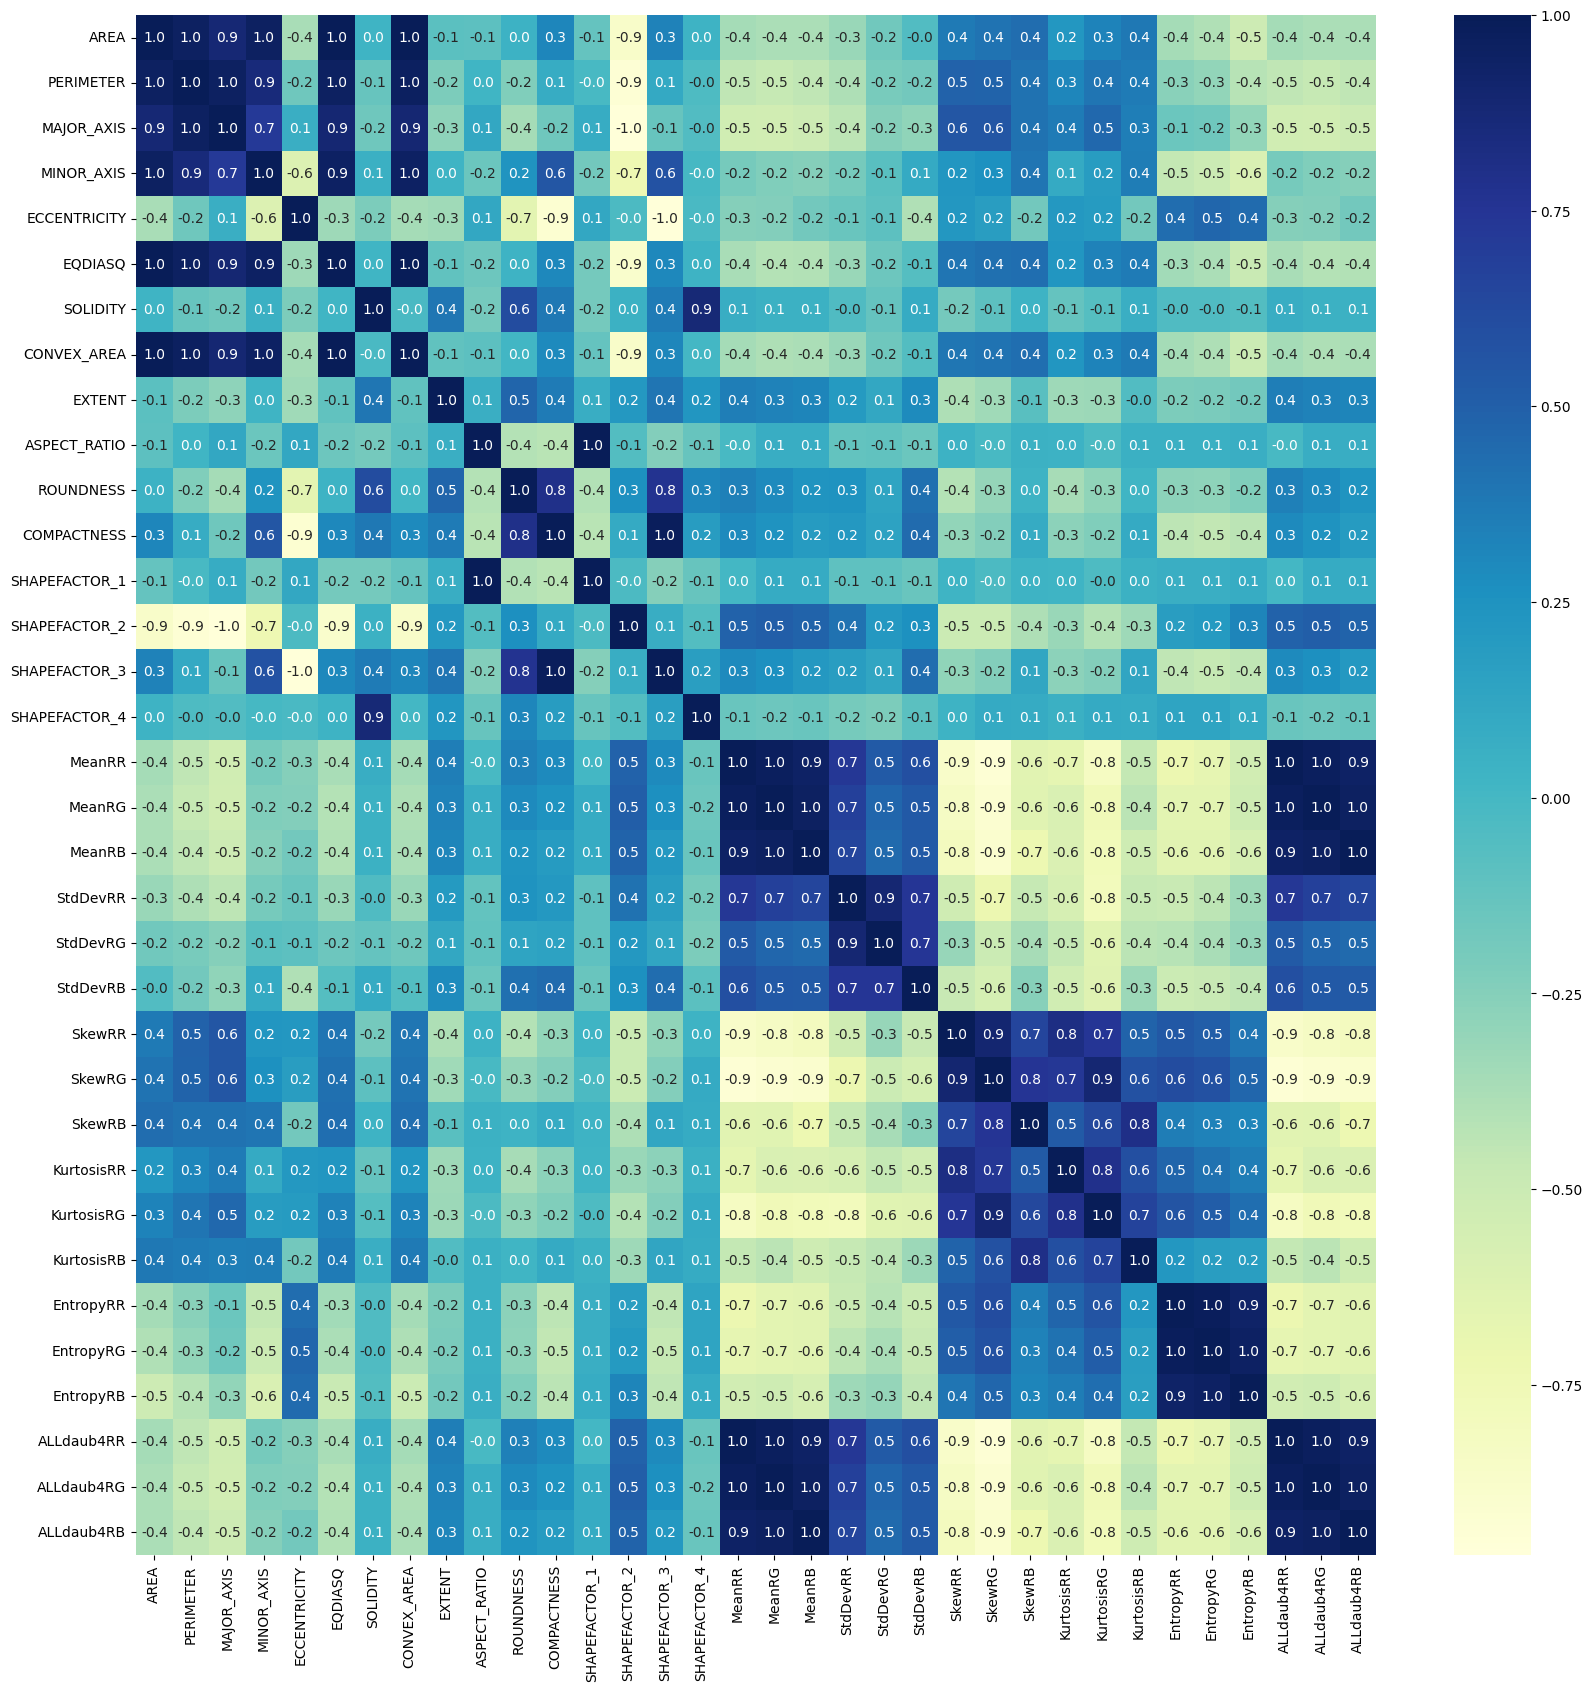

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.show()

In [150]:
dataframe.Class.value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [151]:
# Count the occurrences of each class
class_counts = dataframe['Class'].value_counts()

# Display the class counts
print(class_counts)

# Calculate the proportion of samples for each class
total_samples = class_counts.sum()
class_proportions = class_counts / total_samples

# Display the class proportions
print(class_proportions)


Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64
Class
DOKOL     0.227171
SAFAVI    0.221604
ROTANA    0.184855
DEGLET    0.109131
SOGAY     0.104677
IRAQI     0.080178
BERHI     0.072383
Name: count, dtype: float64


In [152]:
def zero_r_baseline(dataframe):
    # Count the occurrences of each class
    class_counts = dataframe['Class'].value_counts()

    # Find the most frequent class
    most_frequent_class = class_counts.idxmax()

    # Calculate the proportion of samples for the most frequent class
    total_samples = class_counts.sum()
    class_proportion = class_counts[most_frequent_class] / total_samples

    # Return the most frequent class and its proportion
    return most_frequent_class, class_proportion

# Calculate baseline using Zero-R
baseline_class, baseline_proportion = zero_r_baseline(dataframe)

# Display the baseline class and its proportion
print("Baseline Class:", baseline_class)
print("Baseline Proportion:", baseline_proportion)


Baseline Class: DOKOL
Baseline Proportion: 0.22717149220489977


In [153]:
class_counts = {
    'DOKOL': 204,
    'SAFAVI': 199,
    'ROTANA': 166,
    'DEGLET': 98,
    'SOGAY': 94,
    'IRAQI': 72,
    'BERHI': 65
}

total_samples = sum(class_counts.values())

class_proportions = {cls: count / total_samples for cls, count in class_counts.items()}

print("Class Proportions:")
for cls, proportion in class_proportions.items():
    print(f"{cls}: {proportion:.2%}")


Class Proportions:
DOKOL: 22.72%
SAFAVI: 22.16%
ROTANA: 18.49%
DEGLET: 10.91%
SOGAY: 10.47%
IRAQI: 8.02%
BERHI: 7.24%


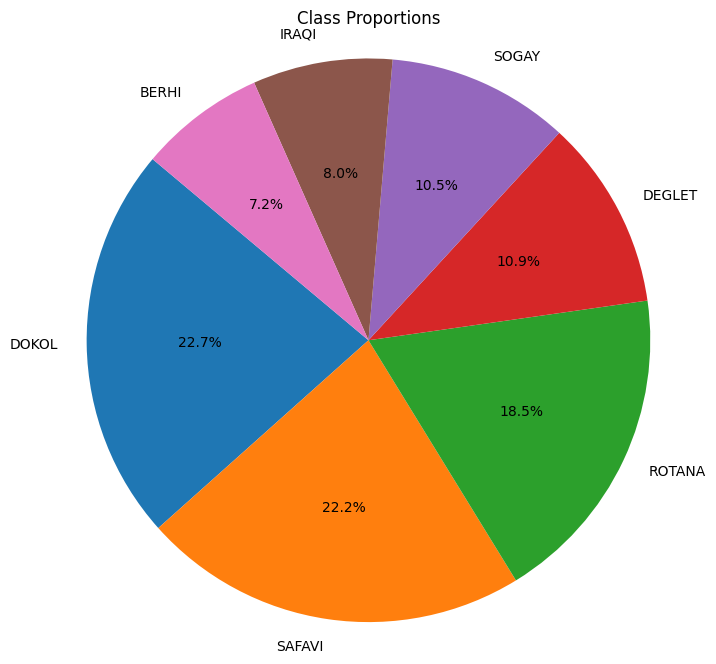

In [154]:
class_counts = {
    'DOKOL': 204,
    'SAFAVI': 199,
    'ROTANA': 166,
    'DEGLET': 98,
    'SOGAY': 94,
    'IRAQI': 72,
    'BERHI': 65
}

total_samples = sum(class_counts.values())

class_proportions = {cls: count / total_samples for cls, count in class_counts.items()}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_proportions.values(), labels=class_proportions.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: xlabel='Class'>

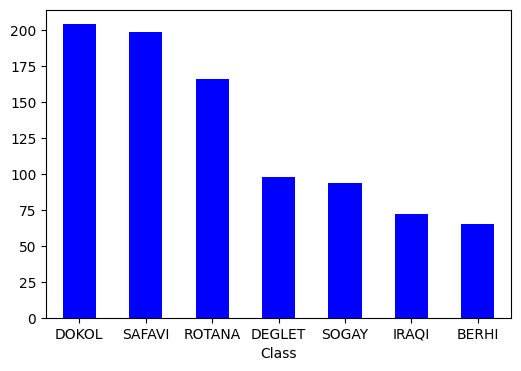

In [155]:
dataframe["Class"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="Blue")

In [156]:
TARGET = ['Class']
FEATURES = [col for col in dataframe.columns if col not in TARGET]
X = dataframe[FEATURES].copy()
pca = PCA(n_components=3, random_state=77)
X_reduced = pca.fit_transform(X)

df_reduced = pd.DataFrame({'x': X_reduced[:, 0],'y': X_reduced[:, 1],'z': X_reduced[:, 2],'label': dataframe[TARGET].values.flatten()})
fig = px.scatter_3d(df_reduced, x='x', y='y', z='z',
              color='label')
fig.show()

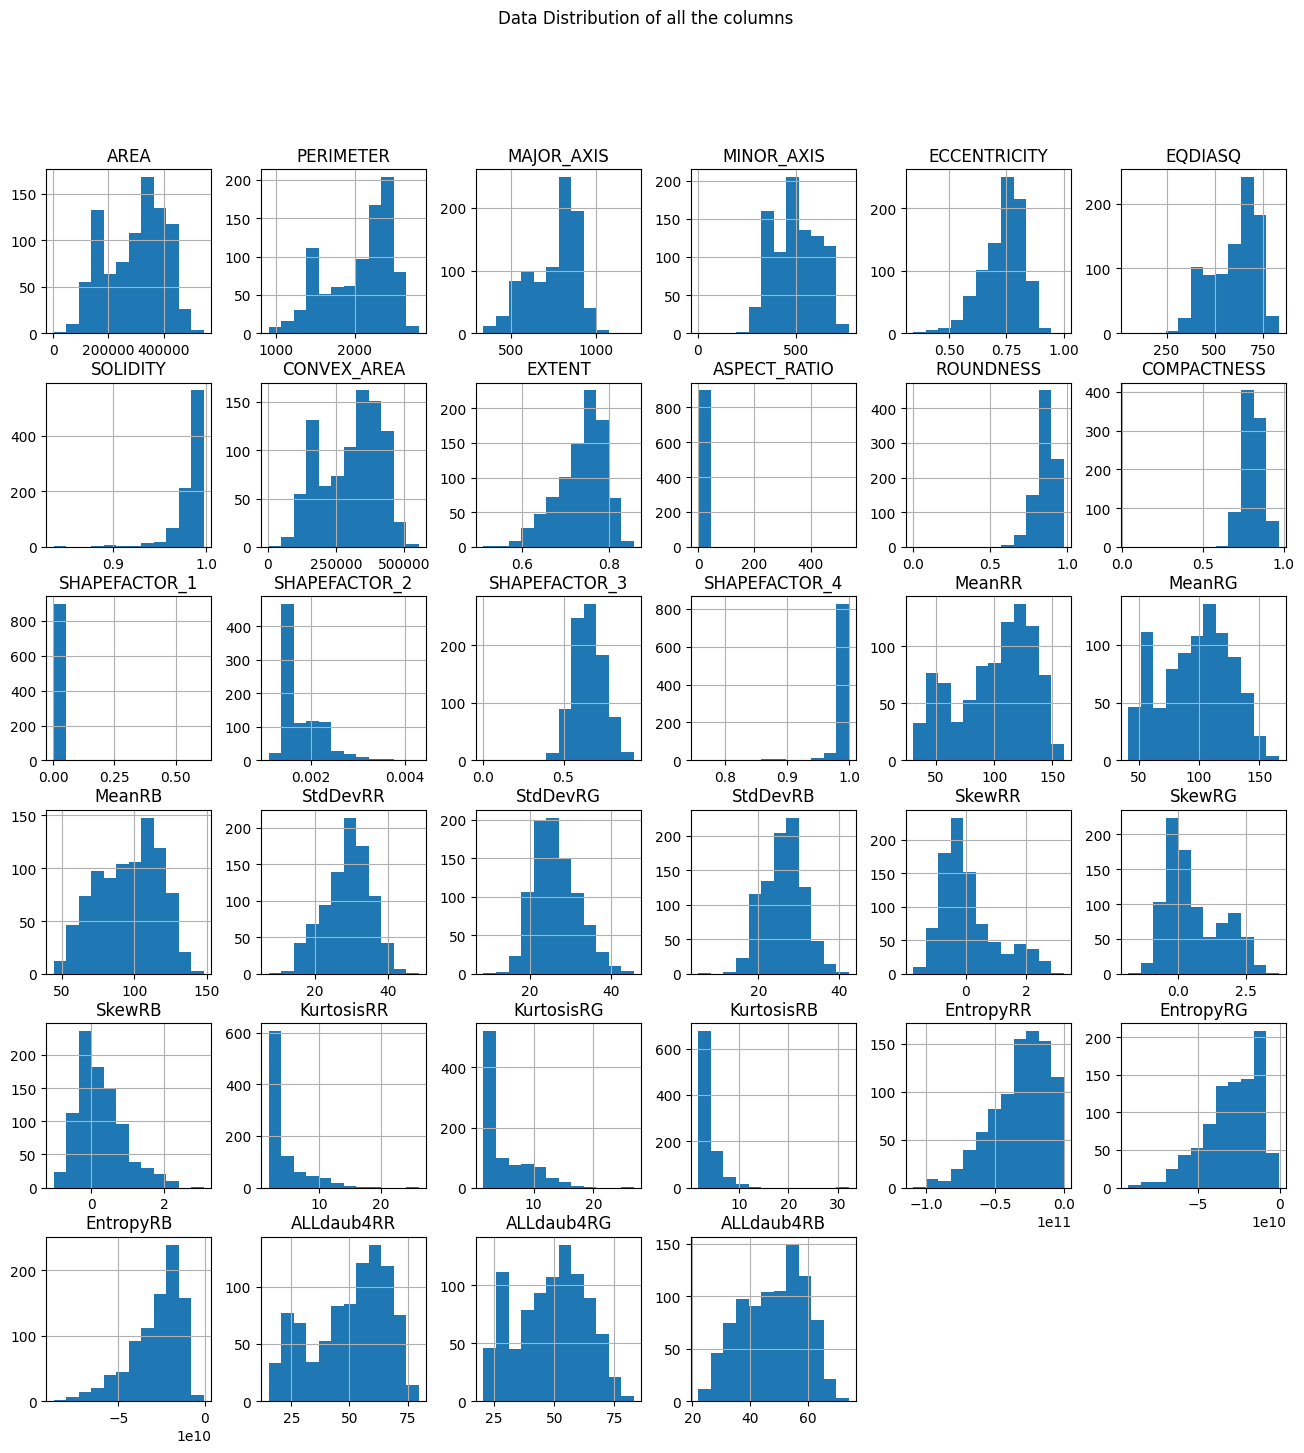

In [157]:
dataframe.hist(bins=12, figsize=(16,16), grid=True)
plt.suptitle("Data Distribution of all the columns")
plt.show()

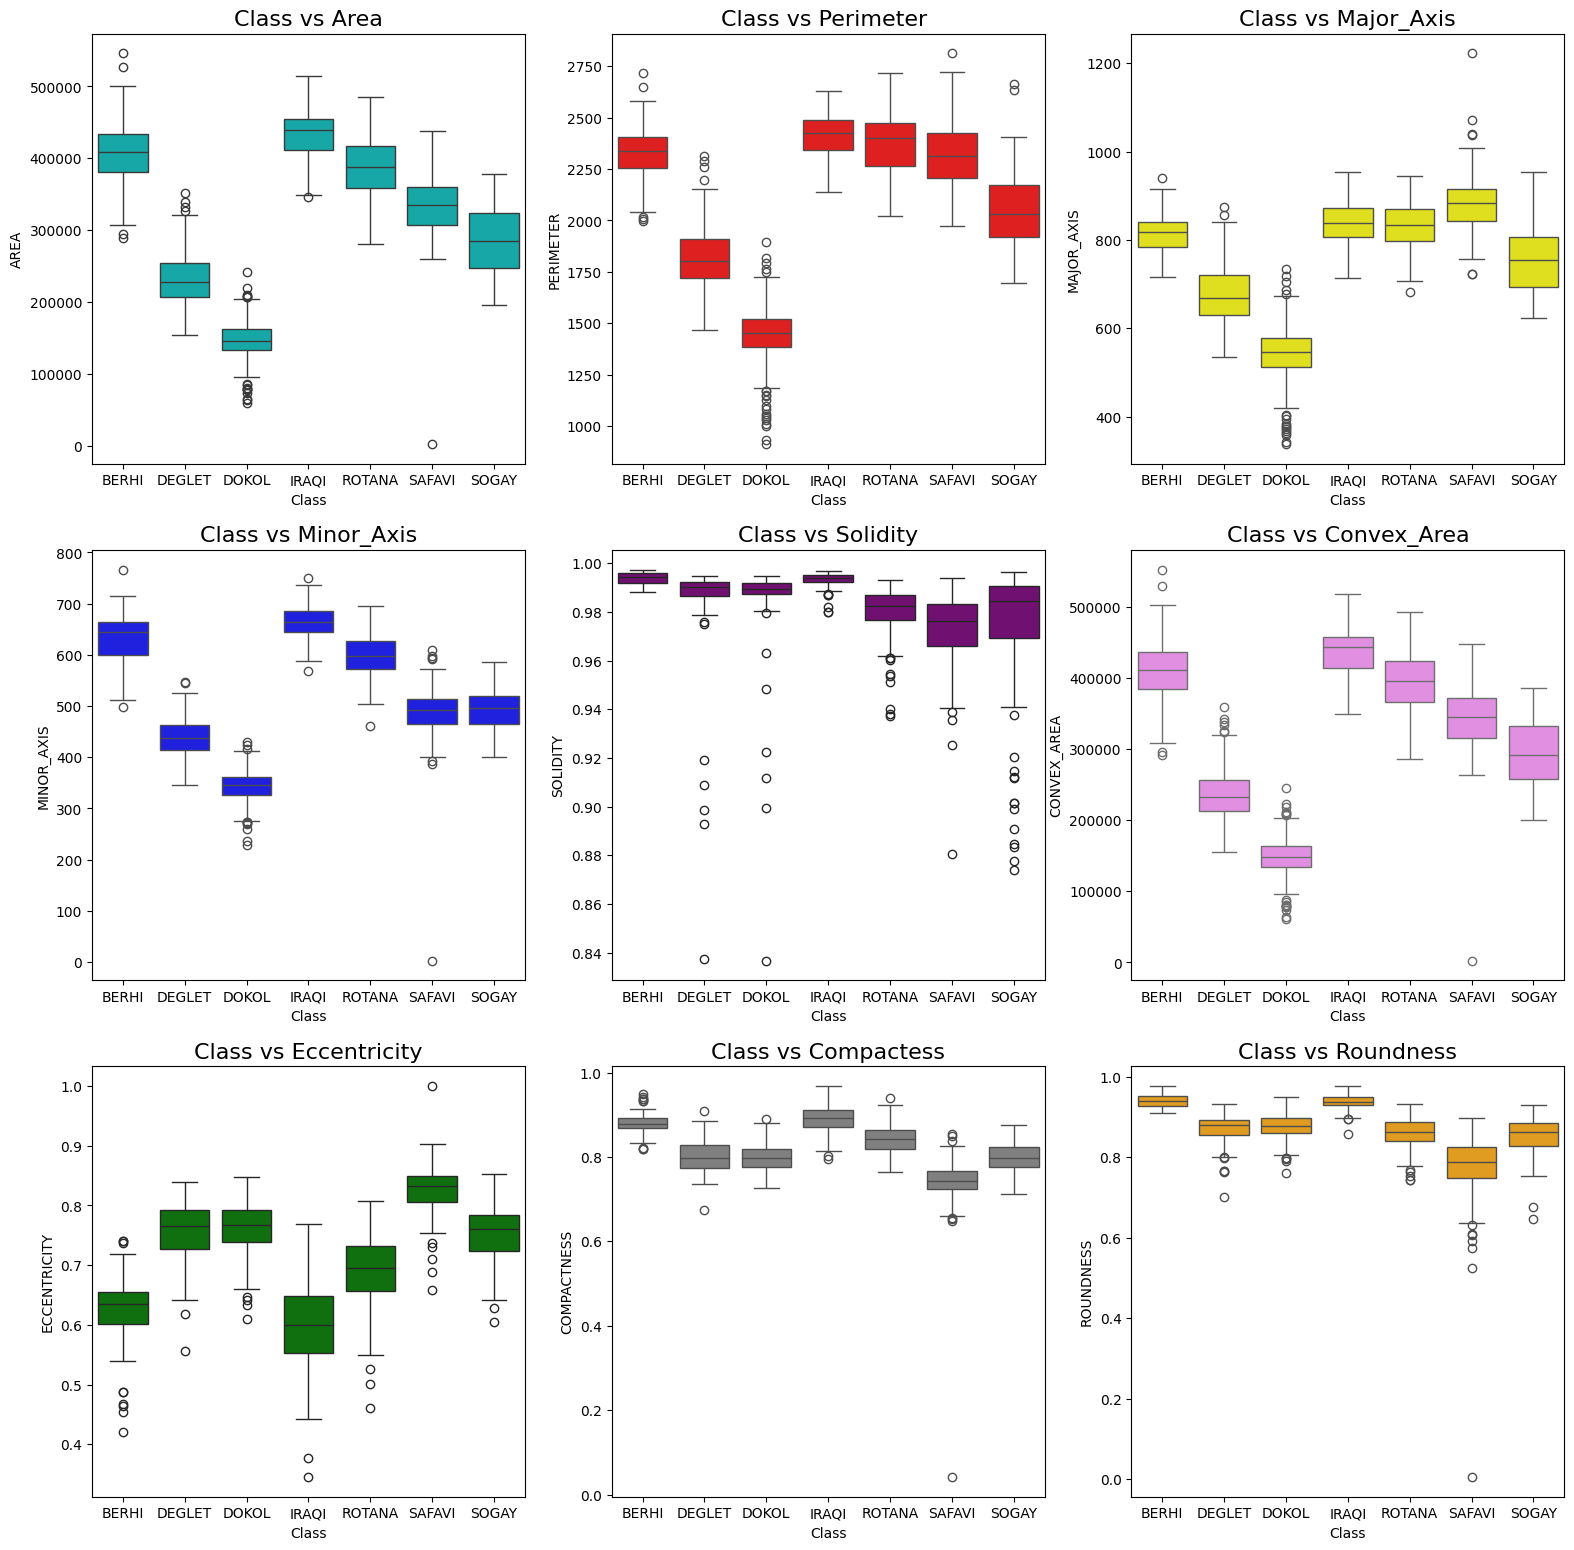

In [158]:
fig=plt.figure(figsize=(19,19))

ax=fig.add_subplot(331)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["AREA"], hue=None ,color='c',ax=ax)
ax.set_title('Class vs Area', fontsize=16)

ax=fig.add_subplot(332)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["PERIMETER"], hue=None ,color='red',ax=ax)
ax.set_title('Class vs Perimeter ', fontsize=16)

ax=fig.add_subplot(333)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MAJOR_AXIS"], hue=None ,color='yellow',ax=ax)
ax.set_title('Class vs Major_Axis', fontsize=16)
ax=fig.add_subplot(334)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["MINOR_AXIS"], hue=None ,color='blue',ax=ax)
ax.set_title('Class vs Minor_Axis', fontsize=16)

ax=fig.add_subplot(335)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["SOLIDITY"], hue=None ,color='purple',ax=ax)
ax.set_title('Class vs Solidity', fontsize=16)

ax=fig.add_subplot(336)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["CONVEX_AREA"], hue=None ,color='violet',ax=ax)
ax.set_title('Class vs Convex_Area', fontsize=16)

ax=fig.add_subplot(337)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ECCENTRICITY"], hue=None ,color='green',ax=ax)
ax.set_title('Class vs Eccentricity', fontsize=16)
ax=fig.add_subplot(338)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["COMPACTNESS"], hue=None ,color='grey',ax=ax)
ax.set_title('Class vs Compactess', fontsize=16)

ax=fig.add_subplot(339)
sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe["ROUNDNESS"], hue=None ,color='orange',ax=ax)
ax.set_title('Class vs Roundness', fontsize=16)


plt.show()

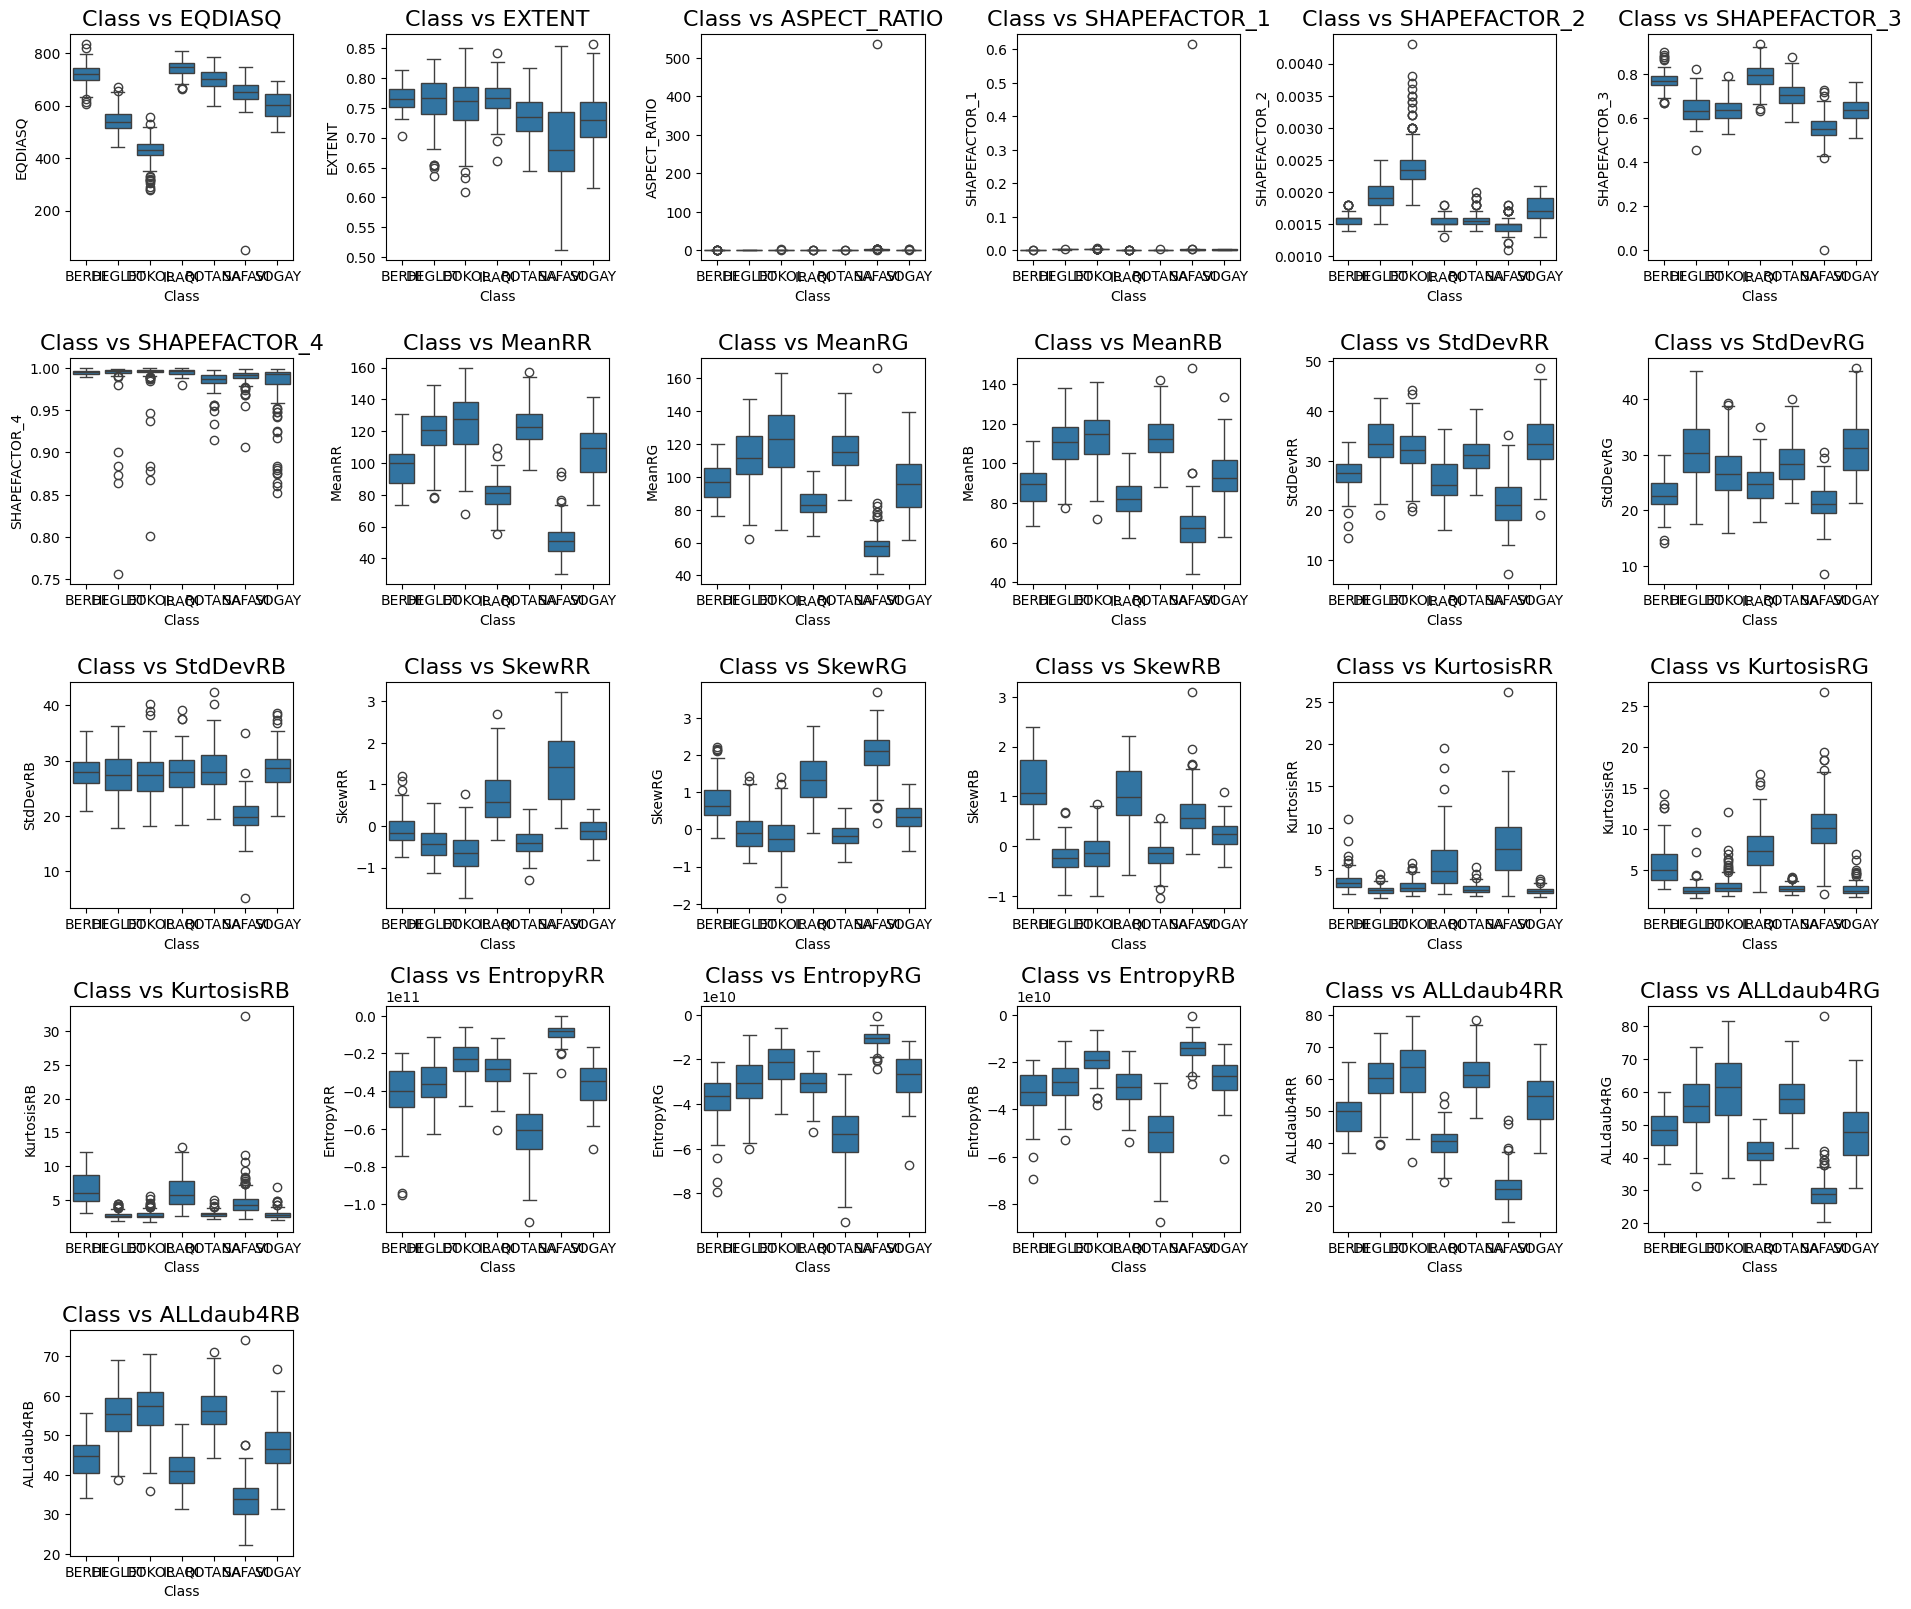

In [159]:
fig = plt.figure(figsize=(19, 19))

# Define the remaining features
remaining_features = [
    "EQDIASQ", "EXTENT", "ASPECT_RATIO", "SHAPEFACTOR_1", "SHAPEFACTOR_2",
    "SHAPEFACTOR_3", "SHAPEFACTOR_4", "MeanRR", "MeanRG", "MeanRB", "StdDevRR",
    "StdDevRG", "StdDevRB", "SkewRR", "SkewRG", "SkewRB", "KurtosisRR",
    "KurtosisRG", "KurtosisRB", "EntropyRR", "EntropyRG", "EntropyRB",
    "ALLdaub4RR", "ALLdaub4RG", "ALLdaub4RB"
]

# Loop through each feature and create boxplots
for i, feature in enumerate(remaining_features, start=1):
    ax = fig.add_subplot(6, 6, i)
    sns.boxplot(data=dataframe, x=dataframe["Class"], y=dataframe[feature], hue=None, ax=ax)
    ax.set_title(f'Class vs {feature}', fontsize=16)

plt.tight_layout()
plt.show()


In [160]:
dataframe.drop(["PERIMETER","MAJOR_AXIS","MINOR_AXIS","CONVEX_AREA","MeanRR","ALLdaub4RR","EntropyRG"], axis=1, inplace=True)

In [181]:
dataframe.drop(["MeanRG","StdDevRR","StdDevRG","ALLdaub4RB","EntropyRB","SkewRG","SkewRR","KurtosisRR","KurtosisRG"], axis=1, inplace=True)

In [182]:
# Remove non-numeric columns
numeric_dataframe = dataframe.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_dataframe.corr()
correlation_matrix

,AREA,ECCENTRICITY,EQDIASQ,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRB,StdDevRB,SkewRB,KurtosisRB,EntropyRR,ALLdaub4RG
AREA,1.000000,-0.370303,0.993243,0.027371,-0.086286,-0.095342,0.044346,0.315197,-0.124025,-0.861870,0.332349,0.039321,-0.376241,-0.048223,0.433323,0.381096,-0.359332,-0.380747
ECCENTRICITY,-0.370303,1.000000,-0.335085,-0.220434,-0.342775,0.110238,-0.659626,-0.917470,0.114084,-0.026945,-0.967224,-0.020083,-0.180566,-0.393799,-0.177619,-0.179358,0.431537,-0.238875
EQDIASQ,0.993243,-0.335085,1.000000,0.018777,-0.112353,-0.157370,0.035564,0.301535,-0.186715,-0.887398,0.304564,0.037291,-0.400673,-0.065181,0.424774,0.369371,-0.346338,-0.408394
SOLIDITY,0.027371,-0.220434,0.018777,1.000000,0.392552,-0.189234,0.611010,0.384826,-0.188307,0.047237,0.367759,0.874596,0.052076,0.092009,0.033952,0.069564,-0.038697,0.054499
EXTENT,-0.086286,-0.342775,-0.112353,0.392552,1.000000,0.067207,0.470357,0.365187,0.072829,0.216175,0.394855,0.229890,0.321018,0.290517,-0.077197,-0.046479,-0.217372,0.337605
ASPECT_RATIO,-0.095342,0.110238,-0.157370,-0.189234,0.067207,1.000000,-0.410407,-0.422474,0.999515,-0.055882,-0.243065,-0.134463,0.076433,-0.148727,0.050809,0.058655,0.058019,0.076399
ROUNDNESS,0.044346,-0.659626,0.035564,0.611010,0.470357,-0.410407,1.000000,0.797785,-0.405177,0.264122,0.761814,0.314904,0.241061,0.422465,0.031867,0.019284,-0.272178,0.294489
COMPACTNESS,0.315197,-0.917470,0.301535,0.384826,0.365187,-0.422474,0.797785,1.000000,-0.424140,0.094462,0.980968,0.187892,0.195304,0.445412,0.088868,0.094863,-0.437065,0.247006
SHAPEFACTOR_1,-0.124025,0.114084,-0.186715,-0.188307,0.072829,0.999515,-0.405177,-0.424140,1.000000,-0.025354,-0.245419,-0.136144,0.091089,-0.142399,0.037790,0.047554,0.065462,0.091702
SHAPEFACTOR_2,-0.861870,-0.026945,-0.887398,0.047237,0.216175,-0.055882,0.264122,0.094462,-0.025354,1.000000,0.075128,-0.057377,0.480688,0.261633,-0.387306,-0.333756,0.183638,0.507461


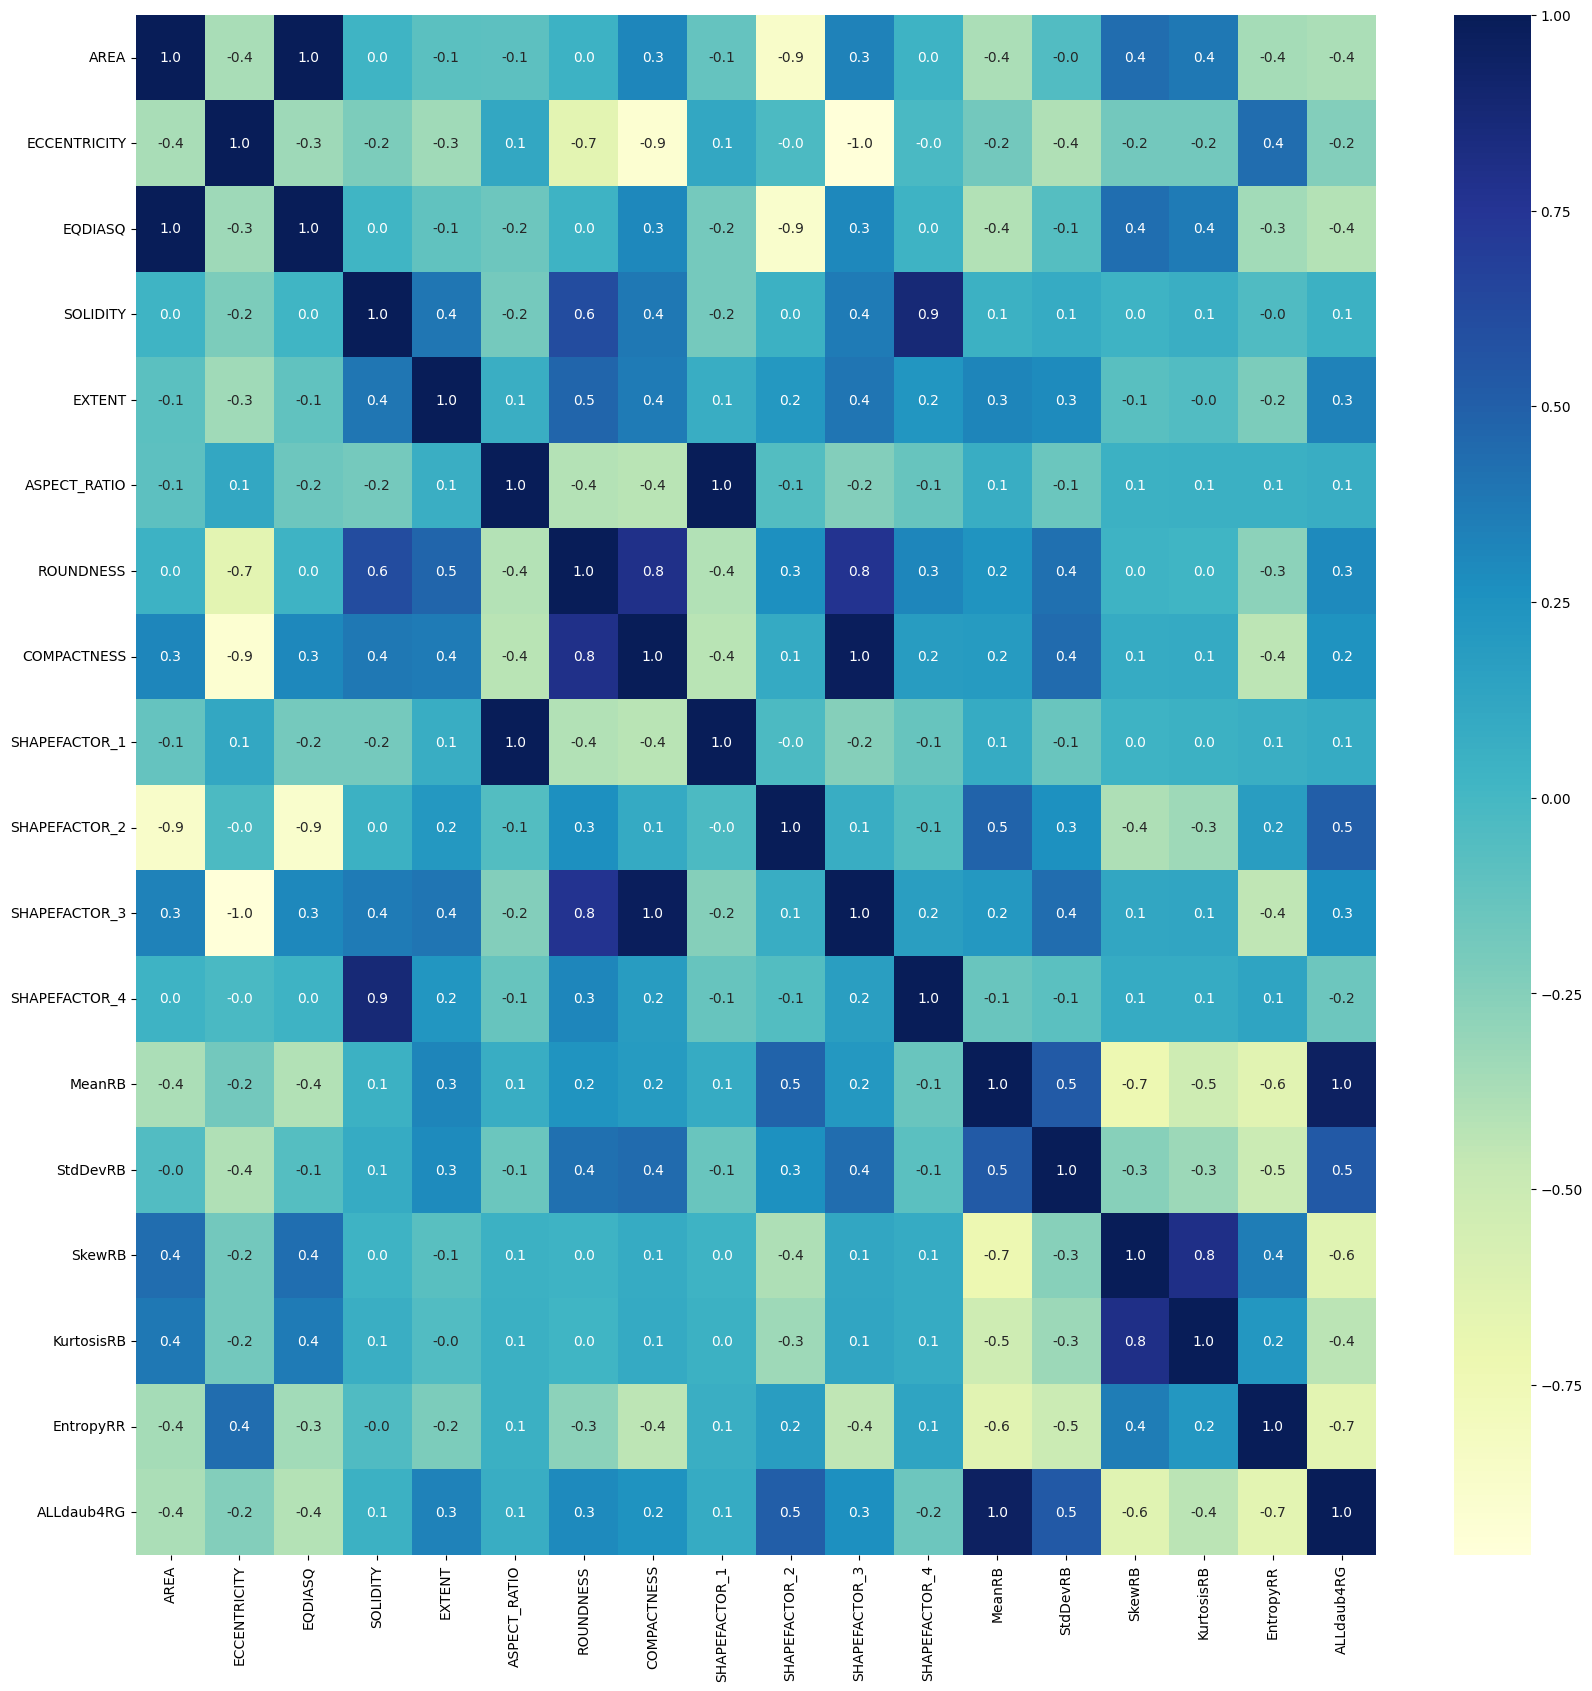

In [183]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.show()

In [184]:
from sklearn.model_selection import train_test_split

def train_test_split_data(dataframe, target, test_size, random_state):
    # Splitting into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(
        dataframe.drop([target], axis=1),
        dataframe[target],
        test_size=test_size,
        random_state=random_state,
        stratify=dataframe[target]
    )
    
    # Further split the train set into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(
        x_train,
        y_train,
        test_size=test_size,  # Use the same test_size for validation set
        random_state=random_state,
        stratify=y_train  # Stratify based on the train set
    )

    return x_train, x_val, x_test, y_train, y_val, y_test

In [185]:
x_train, x_val, x_test, y_train, y_val, y_test = train_test_split_data(dataframe, 'Class', test_size=0.2, random_state=42)
#((574, 27), (144, 27), (180, 27), (574,), (144,), (180,))

In [186]:
#x_train.shape,x_test.shape, y_train.shape, y_test.shape
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((574, 18), (144, 18), (180, 18), (574,), (144,), (180,))

In [187]:
def get_numerical_and_categorical_columns(dataframe):
    
    numerical_cols = []
    categorical_cols = []
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)
            
    return numerical_cols, categorical_cols

In [188]:
numerical_cols, categorical_cols=get_numerical_and_categorical_columns(dataframe)

In [189]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [190]:
ratio_of_outliers,x_train,y_train= Winsorization_Method(numerical_cols, x_train, y_train, a=0.2, b=99.2)

In [191]:
ratio_of_outliers

11.32

In [192]:
x_train.shape, y_train.shape
#((535, 27), (535,))

((509, 18), (509,))

In [193]:
# Scale the features
robust_scaler = RobustScaler()
x_train_scaled = robust_scaler.fit_transform(x_train)
x_val_scaled = robust_scaler.transform(x_val)
x_test_scaled = robust_scaler.transform(x_test)   

In [194]:
# Encode the target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [195]:
def modelling(x_train, x_val, x_test, y_train, y_val, y_test):
    # Create empty lists to store the results
    precision = []
    recall = []
    f1 = []

    # List of models
    models = [
        LogisticRegression(),
        SVC(kernel="linear"),
        RandomForestClassifier(n_estimators=200, criterion="gini"),
    ]
    
    # Iterate over the list of models and train and predict it
    for model in models:
        model.fit(x_train_scaled, y_train_encoded)
        y_pred = model.predict(x_val_scaled)
        precision.append(precision_score(y_val_encoded, y_pred, average="micro"))
        recall.append(recall_score(y_val_encoded, y_pred, average="micro"))
        f1.append(f1_score(y_val_encoded, y_pred, average="micro"))

    model_names = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
    result_df = pd.DataFrame({'Recall': recall, 'Precision': precision, 'F1_Score': f1}, index=model_names)
    result_df = result_df.sort_values(by="Recall", ascending=False)
    return result_df

In [199]:
from sklearn.metrics import confusion_matrix

def modelling(x_train, x_val, x_test, y_train, y_val, y_test):
    # Create empty lists and dictionary to store the results
    precision = []
    recall = []
    f1 = []
    confusion_matrices = {}

    # List of models
    models = [
        LogisticRegression(multi_class = "multinomial",solver = 'lbfgs', penalty = 'l2', C = 0.8 ,max_iter = 50000),
        SVC(kernel="linear"),
         RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0, criterion="entropy", class_weight="balanced"
                             , max_features=None, max_samples=0.5, oob_score=True)
    ]
    
    # Iterate over the list of models and train and predict it
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        
        # Calculate precision, recall, and F1-score
        precision.append(precision_score(y_val, y_pred, average="micro"))
        recall.append(recall_score(y_val, y_pred, average="micro"))
        f1.append(f1_score(y_val, y_pred, average="micro"))
        
        # Calculate confusion matrix
        confusion_matrices[model.__class__.__name__] = confusion_matrix(y_val, y_pred)

    model_names = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
    result_df = pd.DataFrame({'Recall': recall, 'Precision': precision, 'F1_Score': f1}, index=model_names)
    result_df = result_df.sort_values(by="Recall", ascending=False)
    
    return result_df, confusion_matrices

# Example usage:
# result_df, confusion_matrices = modelling(x_train_scaled, x_val_scaled, x_test_scaled, y_train_encoded, y_val_encoded, y_test_encoded)
# print(confusion_matrices)


In [200]:
result_df, confusion_matrices = modelling(x_train_scaled, x_val_scaled, x_test_scaled, y_train_encoded, y_val_encoded, y_test_encoded)
result_df
#print(confusion_matrices)

,Recall,Precision,F1_Score
RandomForestClassifier,0.923611,0.923611,0.923611
LogisticRegression,0.888889,0.888889,0.888889
SVC,0.868056,0.868056,0.868056


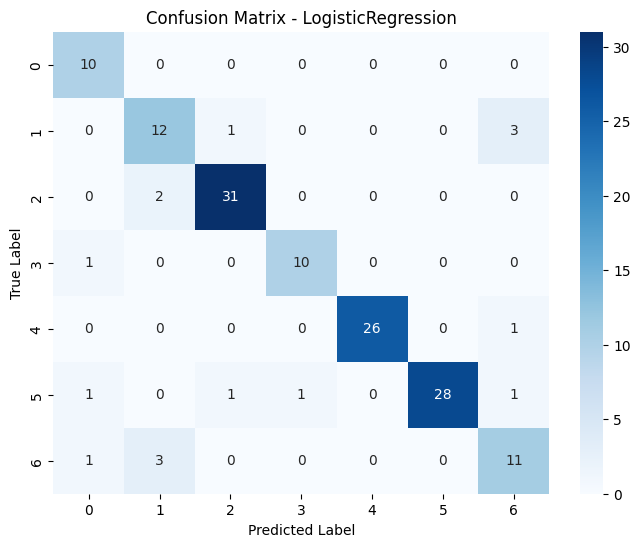

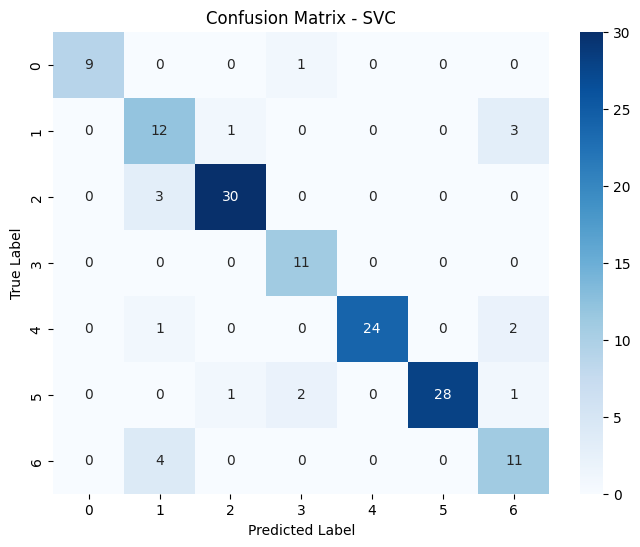

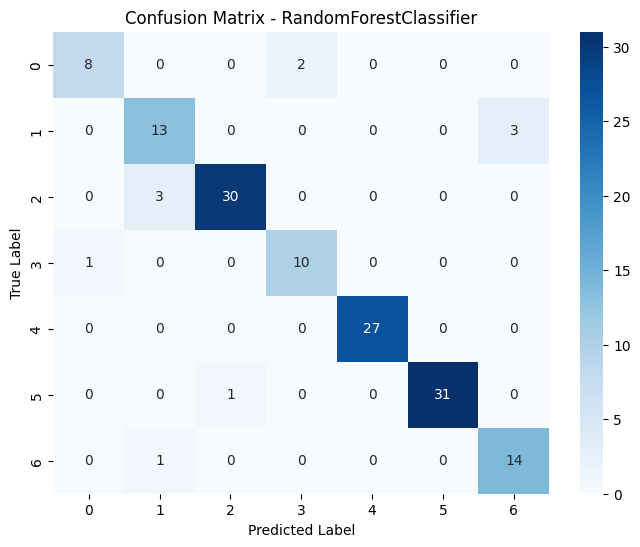

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_confusion_matrices(confusion_matrices):
    # Loop over each model and its corresponding confusion matrix
    for model_name, confusion_matrix in confusion_matrices.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()

# Example usage:
visualize_confusion_matrices(confusion_matrices)


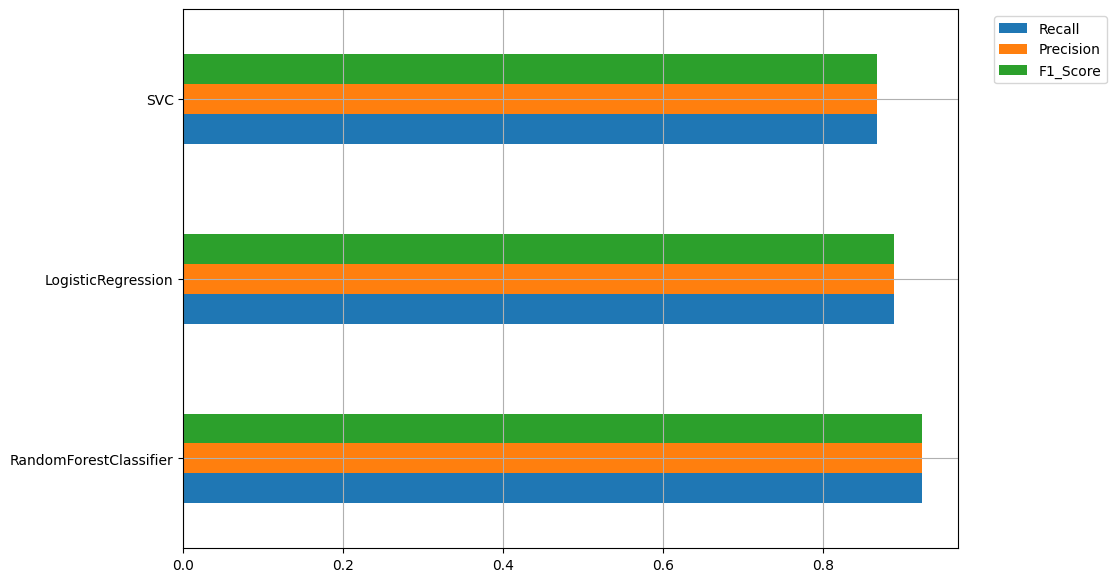

In [202]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.2,1))